In [1]:
import pandas as pd

# Time Features

In [2]:
date_features = pd.read_parquet("../data/02_intermediate/transactions_train.parquet", columns=["t_dat"])
time_features = pd.read_parquet("../data/04_feature/transactions_train_time_ft.parquet")

In [3]:
date_features["t_dat"] = pd.to_datetime(date_features["t_dat"])

In [4]:
days, _ = pd.factorize(date_features["t_dat"])
days += 1
days

array([  1,   1,   1, ..., 734, 734, 734], dtype=int64)

In [5]:
weeks = (days // 7) + 1
weeks

array([  1,   1,   1, ..., 105, 105, 105], dtype=int64)

In [8]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

def sin_transformer(period):
	return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


In [9]:
sin_transformer(365).fit_transform(days)

array([0.01721336, 0.01721336, 0.01721336, ..., 0.06880243, 0.06880243,
       0.06880243])

In [17]:
time_features.day

0             1
1             1
2             1
3             1
4             1
           ... 
31788319    734
31788320    734
31788321    734
31788322    734
31788323    734
Name: day, Length: 31788324, dtype: int64

<AxesSubplot:>

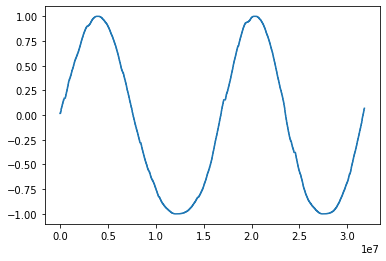

In [10]:
time_features["day_sin"].plot(kind="line")

<AxesSubplot:>

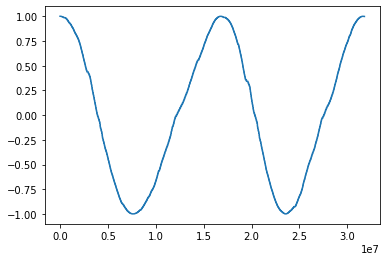

In [11]:
time_features["day_cos"].plot(kind="line")

In [33]:
transformed_ft = ["day_sin", "day_cos"]
time_features[transformed_ft].value_counts()

day_sin    day_cos  
 0.154309   0.988023    198622
 0.939856   0.341571    192971
-0.377708  -0.925925    162799
 0.899631   0.436651    142018
 0.171293   0.985220    141700
                         ...  
 0.976011  -0.217723     18145
 0.051620   0.998667     17635
 0.995105  -0.098820     14799
           -0.098820     13637
 0.976011  -0.217723     12760
Length: 729, dtype: int64

In [29]:
time_features.drop_duplicates(transformed_ft).shape

(733, 6)

In [34]:
len(time_features) == len(date_features)

True